In [1]:
import os
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table
from   cosmo import cosmo
from   fsky import fsky

In [2]:
field = 'G9'
realz = 0

In [3]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_bd_{}_{}.fits'.format(field, realz)

In [4]:
print(fpath)

/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_G9_0.fits


In [5]:
! ls /global/cscratch1/sd/mjwilson/desi/BGS/Sam/

randoms_G9_0.fits  randoms_N8_G9_0.fits  randoms_bd_G9_0.fits


In [6]:
rand = Table(fitsio.read(fpath))

In [7]:
len(rand)

238928

In [8]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,str2,float32,float32,float32,int64,int32,float64,int64
134.17117,2.3735452,0.43865,7196585500.0,78956,G9,1196.9304,-17.492365,39.024498,0,29,12.552445312113056,42080
135.43683,2.6953626,0.554154,13374090000.0,210325,G9,1471.3954,10.990015,56.2434,0,19,11.104053458362483,219376
131.60847,1.9841783,0.20924683,911264450.0,57817,G9,600.1721,-35.64992,15.519789,0,17,10.405473948292922,160343
136.04897,-1.8728818,0.2797835,2080542000.0,70581,G9,791.13354,14.369754,-32.876,0,22,11.566565026627986,34725
134.76877,-0.6464516,0.5746068,14693895000.0,3488,G9,1519.1165,-6.3629904,-30.570475,0,30,35.53724088427908,29348
136.60025,2.571679,0.39387566,5374235000.0,109921,G9,1085.4912,30.14905,39.163303,0,17,9.017837097069506,123892
133.04144,-0.58699465,0.52565336,11648812000.0,89193,G9,1405.171,-48.272484,-26.827076,0,18,33.868932590478686,28101
138.54181,0.86138237,0.4692086,8621625000.0,223329,G9,1269.5966,78.38029,7.9023914,0,27,47.335144494152104,185228
135.0897,-0.226345,0.59067976,15778966000.0,74781,G9,1555.8248,2.199185,-19.898216,0,18,16.180858694771945,1357


(-3.0, 4.0)

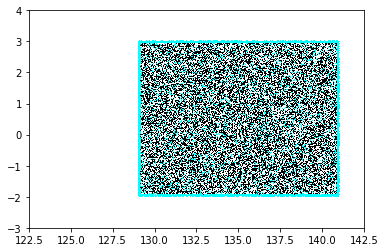

In [9]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlim(122.5, 142.5)
pl.ylim(-3., 4.)

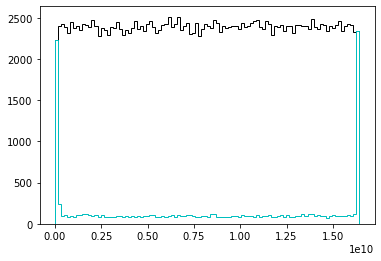

In [10]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

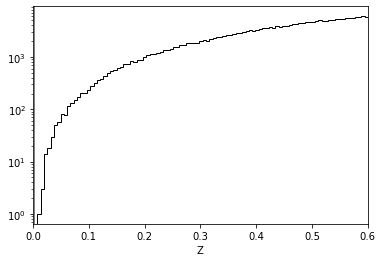

In [11]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

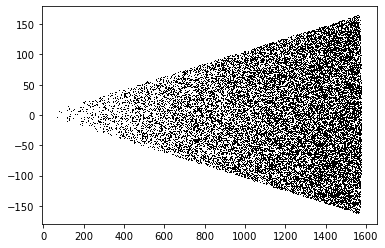

In [12]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

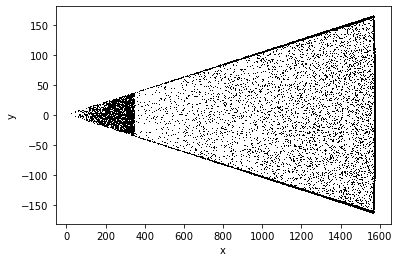

In [13]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1600.0)

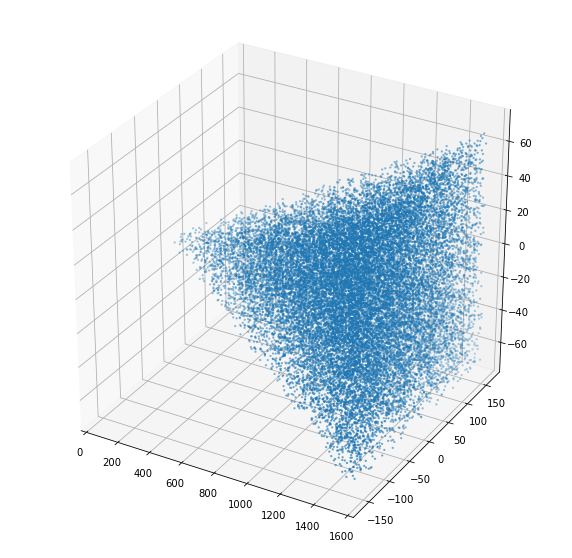

In [14]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

(0.0, 1600.0)

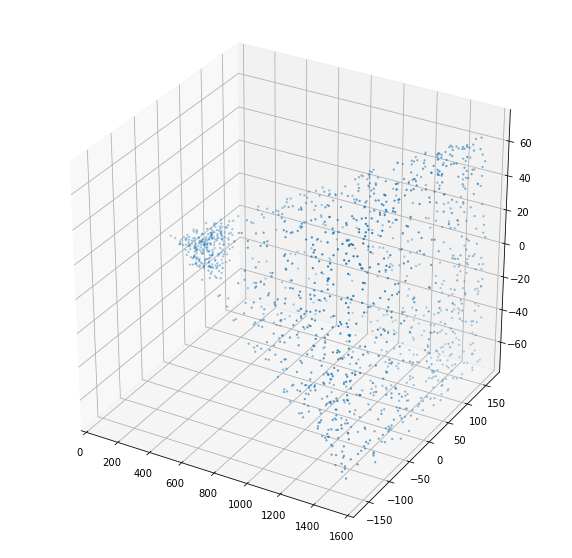

In [15]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

In [16]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010003013460121878

In [17]:
np.mean(rand['IS_BOUNDARY'].data)

0.058816882073260565

In [18]:
rand['N8'].data.min(), rand['N8'].data.max()

(1, 46)

In [19]:
vol  = fsky(5. * 12.) * (cosmo.comoving_volume(0.6).value - cosmo.comoving_volume(0.0).value)
vol8 = (4./3.)*np.pi*(8.**3.)

rand_density = len(rand) / vol

nrand_sphere8 = vol8 * rand_density
perror_sphere8 = np.sqrt(nrand_sphere8)

print('{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(len(rand) / 1.e6, rand_density, nrand_sphere8, perror_sphere8))

0.239	0.010	21.447	4.631


(0.0, 60.0)

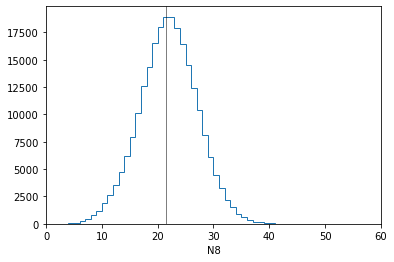

In [20]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 200, 1), histtype='step')
pl.axvline(nrand_sphere8, c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(0.0, 60.)

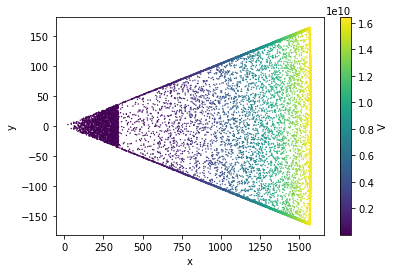

In [21]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

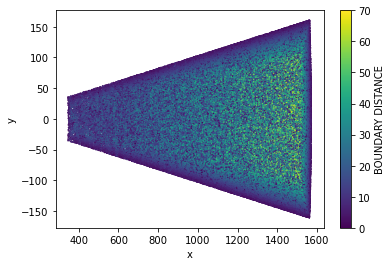

In [22]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

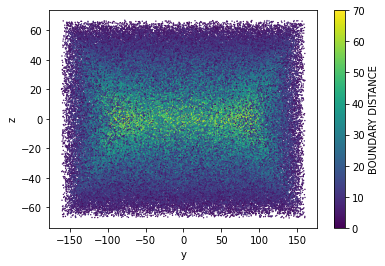

In [23]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

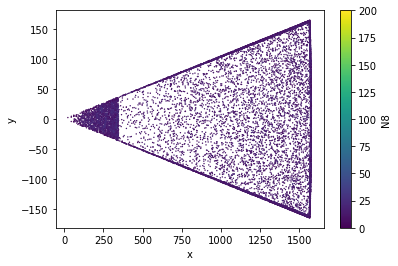

In [24]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=200, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

Text(0, 0.5, 'Random $N_8 / <N_8>$')

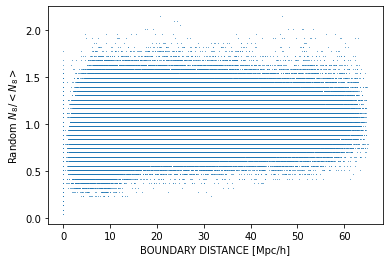

In [25]:
pl.scatter(rand['BOUND_DIST'], rand['N8'] / nrand_sphere8, marker='.', lw=0.0, s=2)

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

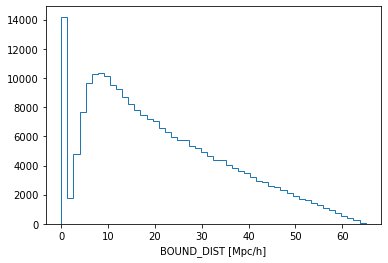

In [26]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

# Done.